<a href="https://colab.research.google.com/github/Factorito/AIportplio/blob/main/Tensorflow_day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # %tensorflow_version only exists in colab
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
rand = tf.random.uniform([2],0,1)
print(rand)

tf.Tensor([0.05303967 0.38112497], shape=(2,), dtype=float32)


In [ ]:
rand = tf.random.normal([4],0,1)
print(rand)

tf.Tensor([-0.25487518 -0.54442644  1.1226932   0.02127685], shape=(4,), dtype=float32)


In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))


In [ ]:
x = 0
y = 1
b = tf.random.normal([1],0,1)
w = tf.random.normal([1],0,1)
output = sigmoid(x*w)
print(output)

0.5


In [ ]:
for i in range(1000):
  output = sigmoid(x*w+b)
  error = y-output
  w = w+x*0.1*error
  b = b+1*0.1*error
  if i % 100 == 99:
    print(i,error,output)

99 0.09441449032047455 0.9055855096795254
199 0.050143535976281406 0.9498564640237186
299 0.03383850064727101 0.966161499352729
399 0.02546256261594182 0.9745374373840582
499 0.020384525325788938 0.9796154746742111
599 0.01698370958797435 0.9830162904120257
699 0.014549574514182817 0.9854504254858172
799 0.012722462633759757 0.9872775373662402
899 0.01130108782360606 0.9886989121763939
999 0.010164124895602922 0.9898358751043971


#AND

In [ ]:
cz

199 -0.11369380160826532
399 -0.06688108622670681
599 -0.04727475591328823
799 -0.03645040997483136
999 -0.029603918258384414
1199 -0.024893673068471893
1399 -0.021458904481278466
1599 -0.018848191645296268
1799 -0.01679601485892937
1999 -0.015143491278675297


In [ ]:
for i in range(4):
  print('X:',x[i],'Y',y[i],'output',sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y [1] output 0.9646462635958419
X: [1 0] Y [0] output 0.02505181640973514
X: [0 1] Y [0] output 0.025128785818712716
X: [0 0] Y [0] output 2.4273859941345627e-05


#OR

In [ ]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[1],[1],[0]])
b = tf.random.normal([1],0,1)
w = tf.random.normal([2],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0]-output
    w = w+x[j]*0.1*error
    b = b+b_x*0.1*error
    error_sum += error

  if i % 200 == 199:
    print(i,error_sum)

199 -0.047814168612602015
399 -0.025381236253264286
599 -0.017167689085255997
799 -0.01292641154072667
999 -0.010347151038655654
1199 -0.008617209946909024
1399 -0.007378421666180628
1599 -0.006447706713772608
1799 -0.005724588012538955
1999 -0.005144855860117148


In [ ]:
for i in range(4):
  print('X:',x[i],'Y',y[i],'output',sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y [1] output 0.9999972133497773
X: [1 0] Y [1] output 0.9898029941715145
X: [0 1] Y [1] output 0.9897721659205967
X: [0 0] Y [0] output 0.025508755423626274


#XOR


In [ ]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])
b = tf.random.normal([1],0,1)
w = tf.random.normal([2],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0]-output
    w = w+x[j]*0.1*error
    b = b+b_x*0.1*error
    error_sum += error

  if i % 200 == 199:
    print(i,error_sum)

199 -0.006343689159920007
399 -0.0002579636760772219
599 -1.0488156464205645e-05
799 -4.225425512816017e-07
999 5.584263274016621e-09
1199 3.722842145670313e-09
1399 3.722842145670313e-09
1599 3.722842145670313e-09
1799 3.722842145670313e-09
1999 3.722842145670313e-09


In [ ]:
for i in range(4):
  print('X:',x[i],'Y',y[i],'output',sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y [0] output 0.5128176286712095
X: [1 0] Y [1] output 0.5128176305326305
X: [0 1] Y [1] output 0.4999999990686774
X: [0 0] Y [0] output 0.5000000009313226


In [ ]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2,activation='sigmoid',input_shape=(2,)),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),loss='mse')
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x,y,epochs=2000,batch_size=1)

Epoch 1/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2555 
Epoch 2/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2521 
Epoch 3/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2434 
Epoch 4/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2498 
Epoch 5/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2104 
Epoch 6/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2915
Epoch 7/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2886 
Epoch 8/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2543 
Epoch 9/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3153
Epoch 10/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2427
Epoch 11/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2194
Epoch 12/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2410
Epoch 13/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2232
Epoch 14/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2718
Epoch 15/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2258
Epo

In [ ]:
model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


array([[0.46784377],
       [0.8564979 ],
       [0.43312007],
       [0.20773989]], dtype=float32)

In [ ]:
for weight in model.weights:
  print(weight)

<Variable path=sequential_3/dense_6/kernel, shape=(2, 2), dtype=float32, value=[[-4.0176454 -1.2097056]
 [ 5.0936112 -3.243208 ]]>
<Variable path=sequential_3/dense_6/bias, shape=(2,), dtype=float32, value=[2.856547   0.14295097]>
<Variable path=sequential_3/dense_7/kernel, shape=(2, 1), dtype=float32, value=[[-3.4125583]
 [-2.5452082]]>
<Variable path=sequential_3/dense_7/bias, shape=(1,), dtype=float32, value=[3.251913]>


#matplotlib


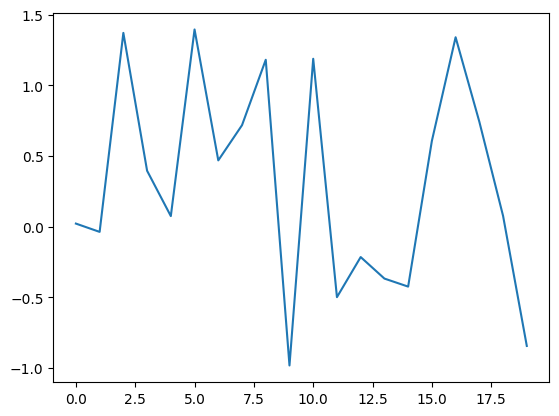

In [ ]:
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y)
plt.show()

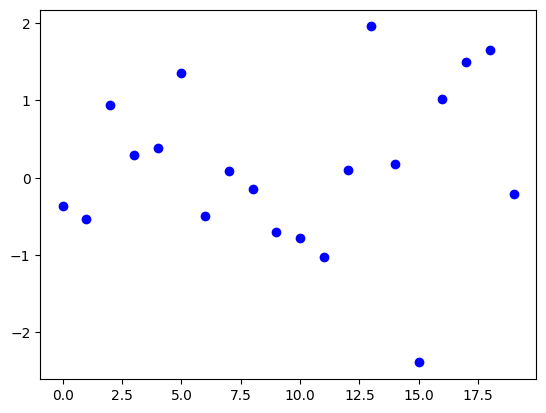

In [ ]:
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y,'bo')
plt.show()

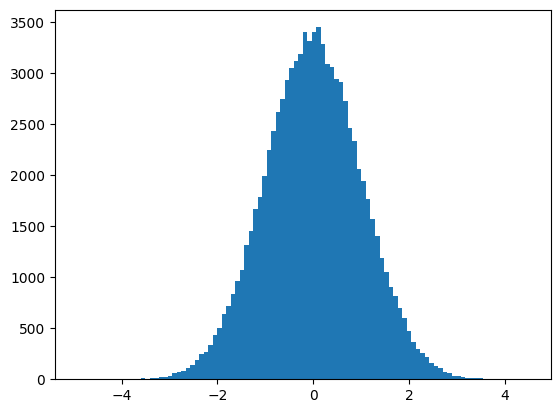

In [ ]:
import matplotlib.pyplot as plt
random_normal = tf.random.normal([90000],0,1)
plt.hist(random_normal,bins=100)
plt.show()

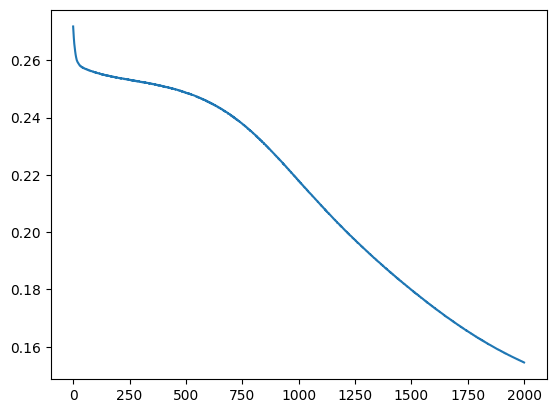

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

#Regression

In [ ]:
#Republic Korea's Drinking rate
from google.colab import files
uploaded = files.upload()


Saving 음주율_20255122185555.xlsx to 음주율_20255122185555.xlsx


In [ ]:
import pandas as pd
df = pd.read_excel('/content/음주율_20255122185555.xlsx')
df.to_csv('data.csv', index=False)

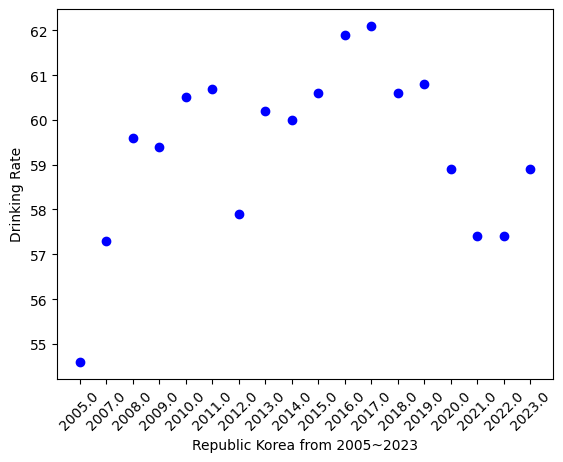

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('data.csv', skiprows=24)
years = df.iloc[0, 1:].astype(str).tolist()
drinking_rates = df.iloc[1, 1:].astype(float).tolist()
plt.plot(years, drinking_rates, 'bo')
plt.xlabel('Republic Korea from 2005~2023')
plt.ylabel('Drinking Rate')
plt.xticks(rotation=45)
plt.show()

a: 0.07837240159221573 b: -98.49907120743012


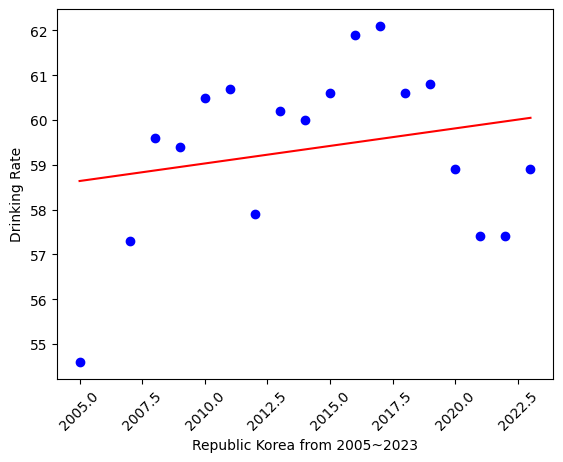

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = [int(float(year)) for year in years]
y = drinking_rates
x_bar = sum(x)/len(x)
y_bar = sum(y)/len(y)
a = sum([(y_val-y_bar)*(x_val-x_bar)for y_val,x_val in list(zip(y,x))])
a /= sum([(x_val-x_bar)**2 for x_val in x])
b = y_bar - a*x_bar
print('a:',a, 'b:',b)

line_x = np.arange(min(x),max(x)+1,1)
line_y = a*line_x+b

plt.plot(line_x,line_y,'r-')

plt.plot(x,y,'bo')
plt.xlabel('Republic Korea from 2005~2023')
plt.ylabel('Drinking Rate')
plt.xticks(rotation=45)
plt.show()

#linear

99 a:  0.025891352 b:  -0.8313694 loss: 68.109215
199 a:  0.029892894 b:  -0.82738256 loss: 3.2560349
299 a:  0.029887017 b:  -0.827408 loss: 3.2558966
399 a:  0.029887088 b:  -0.82743156 loss: 3.2558963
499 a:  0.029887103 b:  -0.82745975 loss: 3.2558959
599 a:  0.029887117 b:  -0.82749045 loss: 3.2558968
699 a:  0.029887136 b:  -0.8275262 loss: 3.2558954
799 a:  0.029887155 b:  -0.82756525 loss: 3.2558959
899 a:  0.029887175 b:  -0.827607 loss: 3.255897
999 a:  0.0298872 b:  -0.82765424 loss: 3.2558959


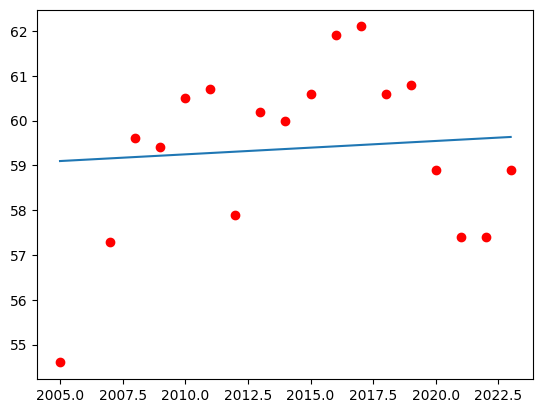

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

a = tf.Variable(random.random())
b = tf.Variable(random.random())

def compute_loss():
  y_pred = a*x+b
  loss = tf.reduce_mean((y-y_pred)**2)
  return loss

optimizer = tf.optimizers.Adam(learning_rate=0.07)

for i in range(1000):
  with tf.GradientTape() as tape: # Use GradientTape
    loss = compute_loss()
  gradients = tape.gradient(loss, [a, b])
  optimizer.apply_gradients(zip(gradients, [a, b])) # Apply gradients

  if i % 100 == 99:
    print(i, 'a: ',a.numpy(), 'b: ',b.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(x),max(x),0.01)
line_y = a*line_x+b

plt.plot(x,y,'ro')
plt.plot(line_x,line_y)
plt.show()

#Square

99 a:  -0.0039694323 b:  -0.185416 c:  -0.79637873 loss: 273635170.0
199 a:  0.00012610239 b:  -0.18132041 c:  -0.792283 loss: 7451.8057
299 a:  0.00010495504 b:  -0.18134157 c:  -0.79230416 loss: 4.131122
399 a:  0.00010484611 b:  -0.18134165 c:  -0.79230416 loss: 3.9366777
499 a:  0.00010484641 b:  -0.18134165 c:  -0.79230416 loss: 3.9366755
599 a:  0.00010484641 b:  -0.18134165 c:  -0.79230416 loss: 3.9366755
699 a:  0.00010484641 b:  -0.18134165 c:  -0.79230416 loss: 3.9366755
799 a:  0.00010484641 b:  -0.18134165 c:  -0.79230416 loss: 3.9366755
899 a:  0.00010484641 b:  -0.18134165 c:  -0.79230416 loss: 3.9366755
999 a:  0.00010484641 b:  -0.18134165 c:  -0.79230416 loss: 3.9366755


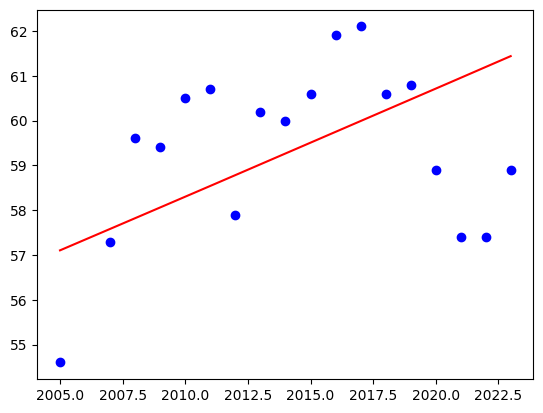

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

x = [int(float(year)) for year in years]
y = drinking_rates
x_bar = sum(x)/len(x)
y_bar = sum(y)/len(y)

a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

def compute_loss():
  y_pred = a*x**2+b*x+c
  loss = tf.reduce_mean((y-y_pred)**2)
  return loss

optimizer = tf.optimizers.Adam(learning_rate=0.07)

# Convert x to a NumPy array
x = np.array(x)

for i in range(1000):
  with tf.GradientTape() as tape: # Use GradientTape
    loss = compute_loss()
  gradients = tape.gradient(loss, [a, b,c])
  optimizer.apply_gradients(zip(gradients, [a, b,c])) # Apply gradients

  if i % 100 == 99:
    print(i, 'a: ',a.numpy(), 'b: ',b.numpy(), 'c: ',c.numpy() ,'loss:', compute_loss().numpy())

line_x = np.arange(min(x),max(x),0.01)
line_y = a*line_x*line_x+b*line_x+c

plt.plot(x,y,'bo')
plt.plot(line_x,line_y,'-r')
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6,activation='tanh',input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mse')
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 6)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np # Import numpy if not already imported in this cell's scope
x = np.array(x) # Convert x to a NumPy array
y = np.array(y) # Convert y to a NumPy array
model.fit(x.reshape(-1, 1), y.reshape(-1, 1), epochs=10) # Reshape x and y



Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 915ms/step - loss: 3655.5361
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 3571.4209
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 3488.3115
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 3406.2249
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 3325.1787
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 3245.1870
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 3166.2656
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 3088.4287
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 3011.6877
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 2936.0574


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


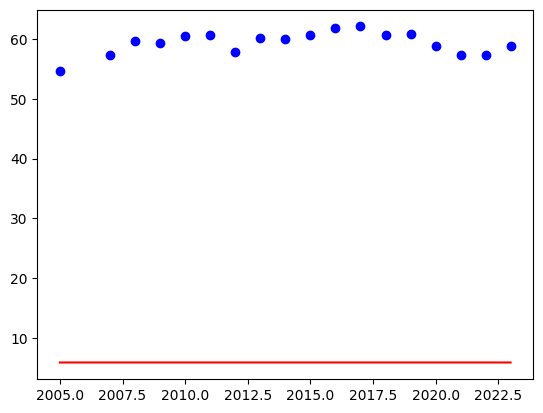

In [ ]:
line_x = np.arange(min(x),max(x),0.01)
line_y = model.predict(line_x)
plt.plot(line_x,line_y,'-r')
plt.plot(x,y,'bo')
plt.show()

#boston_housing

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_x,train_y), (test_x,test_y) = boston_housing.load_data()
print(tain_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

x_mean = train_x.mean()
x_std = train_x.std()
train_x -= x_mean
train_x /= x_std
test_x -= x_mean
test_x /= x_std


y_mean = train_y.mean()
y_std = train_y.std()
train_y -= y_mean
train_y /= y_std
test_y -= y_mean
test_y /= y_std

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52,activation='relu',input_shape=(13,)),
    tf.keras.layers.Dense(units=39,activation='relu'),
    tf.keras.layers.Dense(units=26,activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),loss='mse')
model.summary()

(404, 13) (404,)
(102, 13) (102,)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 52)             │           728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 39)             │         2,067 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 26)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,862 (15.09 KB)

 Trainable params: 3,862 (15.09 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_x,train_y,epochs=25,batch_size=32,validation_split=0.25)

Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 3.1709 - val_loss: 1.2272
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9031 - val_loss: 1.1808
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5872 - val_loss: 1.2109
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8439 - val_loss: 1.4551
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7680 - val_loss: 1.0554
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6284 - val_loss: 1.0523
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6671 - val_loss: 1.0928
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5700 - val_loss: 1.0317
Epoch 9/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6037 - val_loss: 1.0507
Epoch 10/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6920 - val_loss: 1.0340
Epoch 11/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5934 - val_loss: 1.0714
Epoch 12/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6004 - va

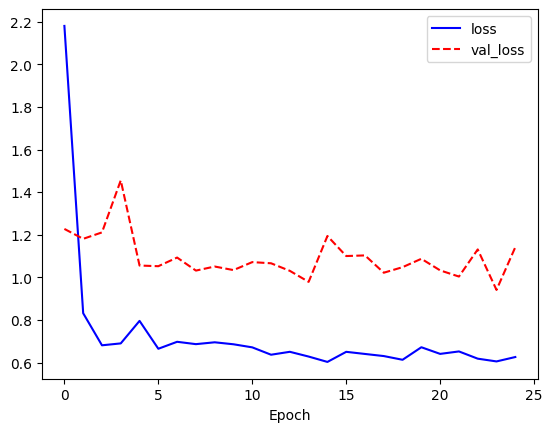

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_x,test_y)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7432


0.795986533164978

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


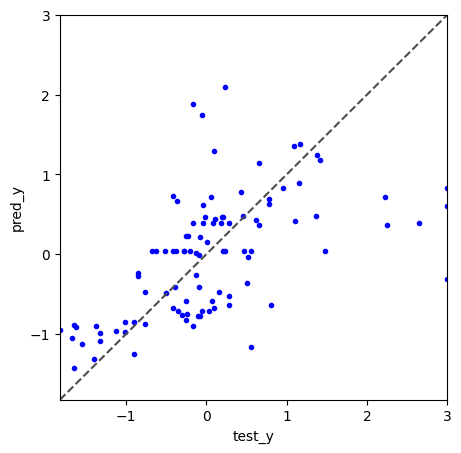

In [ ]:
import matplotlib.pyplot as plt
pred_y = model.predict(test_x)
plt.figure(figsize=(5,5))
plt.plot(test_y,pred_y,'b.')
plt.axis(([min(test_y),max(test_y),min(test_y),max(test_y)]))

plt.plot([min(test_y),max(test_y)],[min(test_y),max(test_y)],ls="--",c=".3") # Corrected syntax
plt.xlabel('test_y')
plt.ylabel('pred_y')
plt.show()

In [ ]:
callbacks=[tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_loss')]
history = model.fit(train_x,train_y,epochs=25,batch_size=32,validation_split=0.25)

Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.5602 - val_loss: 1.1012
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.6047 - val_loss: 1.0112
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6770 - val_loss: 1.0479
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5739 - val_loss: 1.0682
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7551 - val_loss: 0.9959
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5624 - val_loss: 1.0470
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5821 - val_loss: 0.8916
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5551 - val_loss: 0.9309
Epoch 9/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5237 - val_loss: 0.9664
Epoch 10/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6788 - val_loss: 1.4280
Epoch 11/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7267 - val_loss: 0.9618
Epoch 12/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6

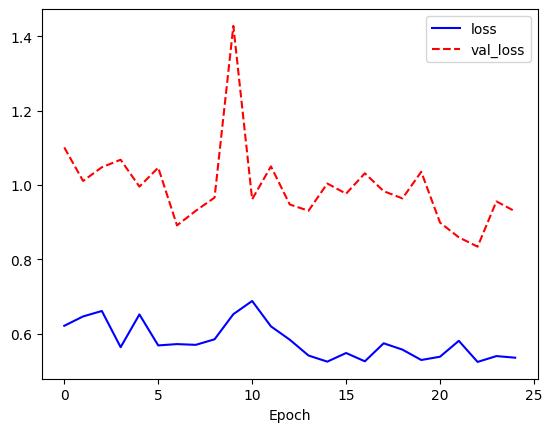

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_x,test_y)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5194


0.5840122103691101